In [23]:
import psycopg2 as postgres
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
connection = postgres.connect(user = "postgres",
                              password = "root",
                              host = "localhost",
                              port = "5432",
                              database = "crawler_db")

In [15]:
cursor = connection.cursor()

Text(0.5, 0, 'Zanr')

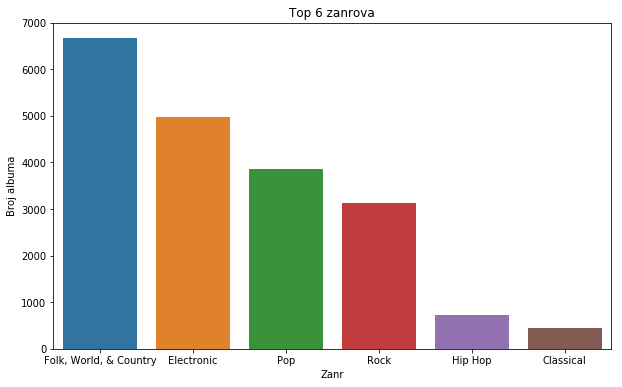

In [87]:
sql = """select genre.name, count(album.name)
         from album_genre
         inner join genre on album_genre.genre_id = genre.id
         inner join album on album_genre.album_id = album.id
         group by genre.name
         order by count(album.name) desc
         limit 6 """
zadatak_a = pd.read_sql(sql, connection)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Top 6 zanrova")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=zadatak_a['name'], y=zadatak_a['count'])

# Add label for vertical axis
plt.ylabel("Broj albuma")
plt.xlabel("Zanr")

Text(0.5, 0, 'Trajanje [sekunde]')

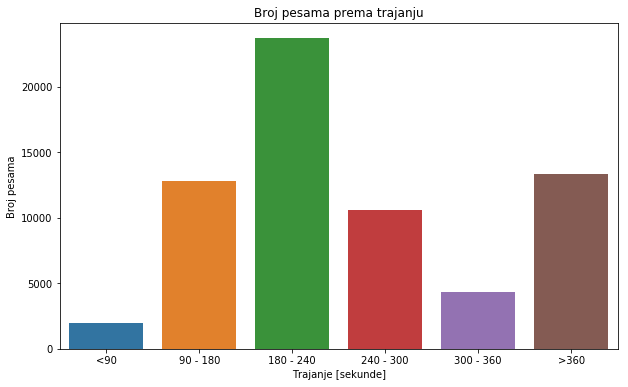

In [89]:
niz_broj_duzina = []
sql = """select count(*)
         from track
         where duration > 0 and duration <= 90"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from track
         where duration > 90 and duration <= 180"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from track
         where duration > 180 and duration <= 240"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from track
         where duration > 240 and duration <= 300"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from track
         where duration > 300 and duration <= 360"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from track
         where duration > 360"""
niz_broj_duzina.append((pd.read_sql(sql, connection))['count'][0])

duzine_kategorije = ['<90', '90 - 180', '180 - 240', '240 - 300', '300 - 360', '>360']

plt.figure(figsize=(10,6))

plt.title("Broj pesama prema trajanju")

sns.barplot(x=duzine_kategorije, y=niz_broj_duzina)

plt.ylabel("Broj pesama")
plt.xlabel("Trajanje [sekunde]")

Text(0.5, 0, 'Dekada')

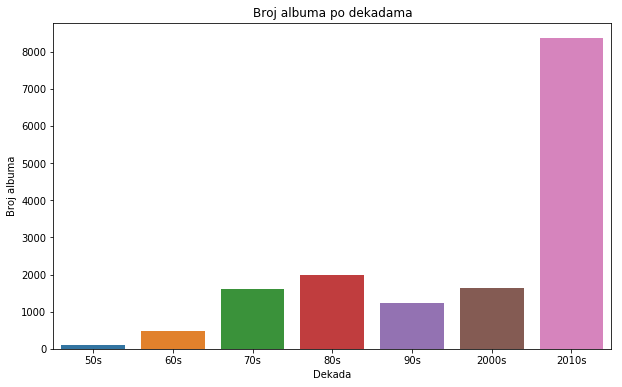

In [91]:
niz_broj_dekade = []
sql = """select count(*)
         from album
         where released >= 1950 and released < 1960"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 1960 and released < 1970"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 1970 and released < 1980"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 1980 and released < 1990"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 1990 and released < 2000"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 2000 and released < 2010"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])
sql = """select count(*)
         from album
         where released >= 2010 and released < 2020"""
niz_broj_dekade.append((pd.read_sql(sql, connection))['count'][0])

dekade_kategorije = ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s']

plt.figure(figsize=(10,6))

plt.title("Broj albuma po dekadama")

sns.barplot(x=dekade_kategorije, y=niz_broj_dekade)

plt.ylabel("Broj albuma")
plt.xlabel("Dekada")